In [47]:
import pandas as pd
import numpy as np
import random 
import math
import matplotlib.pyplot as plt

In [48]:
nombre_file = input("Ingrese el numero de nodos (5, 48 o 101): ")
max_index = int(nombre_file)
nombre_file = nombre_file+"nodes"+".txt"
file  = open(nombre_file, "r")
costo_viaje = 0
lista_recorrido = [] #aqui va el recorrido 

In [49]:
def obteniendo_datos(file):
    lista = []
    for line in file:
        lista.append(line.split())
    
    #del lista[0:4]
    return lista


#acuerdate que esta madre esta en string y cuando acceses para operaciones usa int(lista[x][y])
lista = obteniendo_datos(file) 
#data frame para simplificar el proceso 
df_lista  = (pd.DataFrame(lista)).astype(int) 
df_lista.columns = ['a','x','y']

In [50]:
#imprimiendo df
df_lista

,a,x,y
0,1,12,10
1,2,5,14
2,3,9,11
3,4,7,5
4,5,2,12


In [51]:
#haciendo la matriz de distancias 
m_distancia = np.zeros((max_index, max_index))#array de n * n lleno de "0"
for i in range(max_index):
    start = i
    for j in range(start,max_index):
        m_distancia[i][j] = round(math.sqrt(math.pow((df_lista['x'][i] - df_lista['x'][j]),2) + math.pow((df_lista['y'][i] - df_lista['y'][j]),2)),1)
        m_distancia[j][i] = m_distancia[i][j]

In [52]:
#imprimiendo matriz distancias
df_distancias = pd.DataFrame(m_distancia)

In [53]:
df_distancias

,0,1,2,3,4
0,0.0,8.1,3.2,7.1,10.2
1,8.1,0.0,5.0,9.2,3.6
2,3.2,5.0,0.0,6.3,7.1
3,7.1,9.2,6.3,0.0,8.6
4,10.2,3.6,7.1,8.6,0.0


In [54]:
def menor_distancia(nodo_actual):
    nodo_menor_dist = 0
    costo_menor_distancia = 1000000
    for i in range(max_index):
        if i != nodo_actual:  
            if df_distancias[nodo_actual][i] < costo_menor_distancia:
                nodo_menor_dist  = i 
                costo_menor_distancia =  df_distancias[nodo_actual][i]

    
    return nodo_menor_dist,costo_menor_distancia


In [55]:
#quiero pensar que aqui empieza lo que me va salir a la primera y a mimir
#seleccionando nodo inicial 
nodo_inicial = int(input("ingrese el nodo inicial: ")) - 1

lista_recorrido.append(nodo_inicial)
nodo_menor_dist,costo_menor_ditancia  = menor_distancia(nodo_inicial)
lista_recorrido.append(nodo_menor_dist)
costo_viaje = costo_menor_ditancia *2
#lista_recorrido.append(menor_distancia(nodo_inicial))
lista_recorrido.append(nodo_inicial)

#print('costo viaje: ' + str(costo_viaje))
#print('lista t : '+ str(lista_recorrido))

#aqui comienza la insercion mas barata 

#calculando las delta_f y buscando las mas baratas 
while(len(lista_recorrido) < max_index + 1 ):
    nodo_menor_deltaf = 0
    index_insercion = i + 1
    delta_f_menor = 100000000 #se le asigna un valor alto para que tome los valores reales tal cual inicie 
    for i in range(len(lista_recorrido)-1):
        np_array = np.array(lista_recorrido)
        nodo1 = lista_recorrido[i]
        nodo2 = lista_recorrido[i+1]
        #print(f'inserciones entre {nodo1} y {nodo2}')
        for nodo in range(max_index):
            if nodo in lista_recorrido:#si el nodo ya esta en el recorrido, omitelo
                pass
            else:
                distancia_n1_a_n2 = df_distancias[nodo1][nodo2]
                diatancia_n1_a_ni  = df_distancias[nodo1][nodo]
                distancia_n2_a_ni  = df_distancias[nodo2][nodo]
                #esta es la delta f 
                delta_f_calculada  = (diatancia_n1_a_ni + distancia_n2_a_ni) - distancia_n1_a_n2
                #print(f'nodo: {nodo},  deltaf: {delta_f_calculada}\n')
                if(delta_f_calculada < delta_f_menor):
                    nodo_menor_deltaf = nodo
                    delta_f_menor = delta_f_calculada
                    index_insercion = i + 1
    
    #print(f'\ndf menor:  {delta_f_menor}  index en donde fue insertado: {index_insercion} nodo agregado: {nodo_menor_deltaf}')    
    costo_viaje = costo_viaje + delta_f_menor
    lista_recorrido.insert(index_insercion, nodo_menor_deltaf)
    #print(lista_recorrido)
    #print('')   


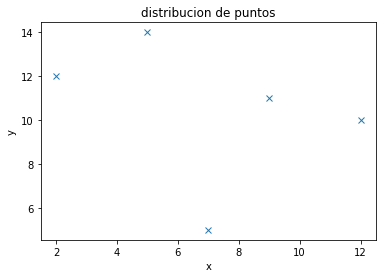

In [56]:
#imprimiendo locaciones 
x = df_lista['x']
y = df_lista['y']

plt.plot(x,y,'x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('distribucion de puntos')
plt.show()

In [57]:
#fin del programa
print('Lista de recorrido:')
print(lista_recorrido)
print('costo: ' + str(costo_viaje))

Lista de recorrido:
[4, 3, 0, 2, 1, 4]
costo: 27.5
